# Data Pre-Processing

Processing the raw data to make it ready for visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing libraries for exploring and processing the data
- **pandas** for data manipulation
- **numpy** for mathematical functionality
- **matplotlib** for plots and visualization

In [2]:
raw_data = pd.read_csv("../assets/new.csv", encoding="gbk", low_memory=False)

Importing the csv file from the *assets* folder. The encoding is set to 'gbk' (*GBK is an extension of the GB 2312 character set for Simplified Chinese characters*) because of presenece of some chineses characters like in the floor column.

# Exploratory Data Analysis

## Data observation and visualization

In [3]:
raw_data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


Data consists of 26 colums: *url, id, Lng, Lat, Cid, tradeTime, DOM, followers, totalPrice, price, buildingType,* etc.

In [4]:
raw_data.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


- **count**: Count number of non-NA/null observations.
- **max**: Maximum of the values in the object.
- **min**: Minimum of the values in the object.
- **mean**: Mean of the values.
- **std**: Standard deviation of the observations.
- the lower percentile is **25** and the upper percentile is **75**. The **50** percentile is the same as the median.

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

In [6]:
raw_data.nunique()

url                    318851
id                     318851
Lng                      3995
Lat                      3993
Cid                      4035
tradeTime                2560
DOM                       551
followers                 547
totalPrice               5780
price                   80042
square                  18298
livingRoom                 11
drawingRoom                22
kitchen                     5
bathRoom                   18
floor                     203
buildingType               12
constructionTime           74
renovationCondition         5
buildingStructure           7
ladderRatio               183
elevator                    2
fiveYearsProperty           2
subway                      2
district                   13
communityAverage         4072
dtype: int64

### Visualize Numerical data

In [7]:
import math

def viz_numerical_data(data, type):
    num_data_cols = data.describe().columns  # get columns
    num_of_cols = 6  # limit columns in final figure
    num_of_rows = int(math.ceil(num_data_cols.size / num_of_cols))
    fig, axs = plt.subplots(
        num_of_rows, num_of_cols, figsize=(num_of_cols * 5, num_of_rows * 5)
    )
    fig_row = -1

    for i, col in enumerate(num_data_cols):
        if i % num_of_rows == 0:
            fig_row += 1

        if type == "hist":
            axs[i % num_of_rows, fig_row].hist(data[col])

        axs[i % num_of_rows, fig_row].title.set_text(col)


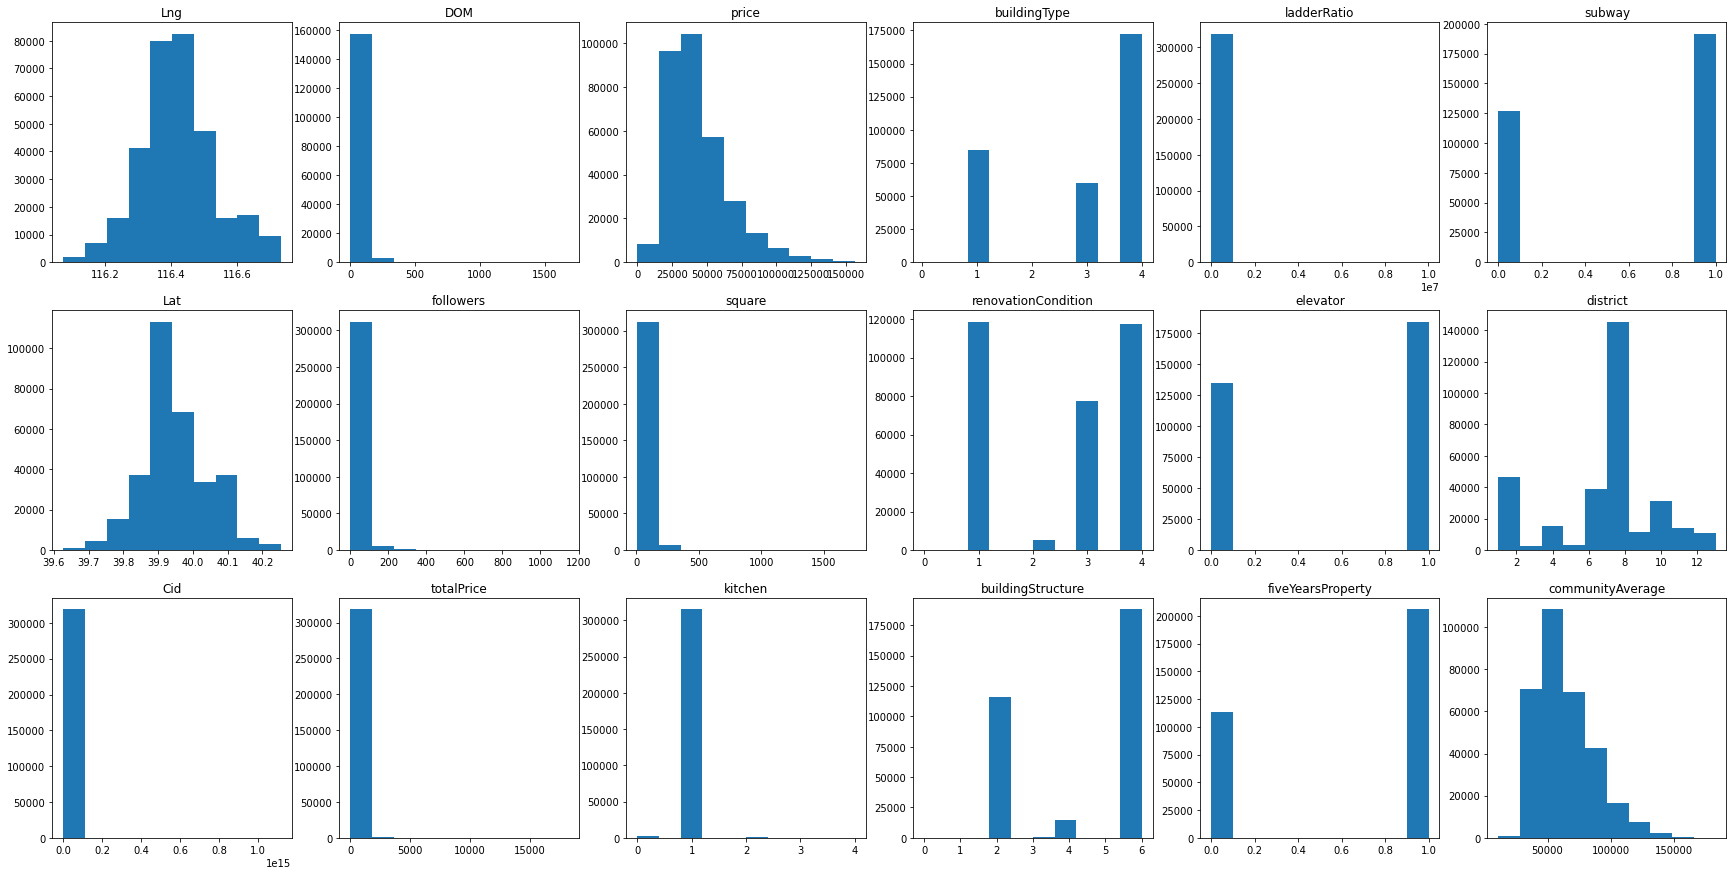

In [8]:
viz_numerical_data(raw_data, "hist")

We visualize the numeric data of all possible columns to get a rough idea on their features and distribution.

##  Missing Values Appraisal

We check for null values in the data frame and calculate them inorder to improve the quality of data later on.

In [9]:
raw_data.isnull().sum()

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

We can see null values in some of the columns: *DOM, buildingType, elevator, fiveYearsProperty, subway, communityAverage*

# Cleaning Data

### Separating some data into atomic units.  
Eg, tradeTime to tradeDay, tradeMonth, tradeYear

In [10]:
year_list, month_list, day_list = list(), list(), list()

for string in raw_data["tradeTime"]:
    year_list.append(string[0:4])
    month_list.append(string[5:7])
    day_list.append(string[8:10])

raw_data["tradeYear"] = year_list
raw_data["tradeMonth"] = month_list
raw_data["tradeDay"] = day_list

raw_data = raw_data.astype(
    {
        "tradeYear": "int64",
        "tradeMonth": "int64",
        "tradeDay": "int64",
    }
)


### Removing Data

We remove some features which are used for uniquely identifying the particular rows of data like *url, id* as well as *floor* which has chinese characters we dont recognize.

In [11]:
raw_data.drop(["url", "id", "floor"], axis=1, inplace=True)

### Filling Missing Data and Noise

#### 1. **Active Days on Market (DOM)**  
This data show the number of days active on the market i.e. time period before being de-enlisted as available for sale. So, inorder to fill this we can use correlation. We find other features in the dataset that correlate with given feature.

*Note: We use values from **spearman correration** on ordinal types of data meanwhile **pearson** on the numeric ones that have continuous range.*

In [12]:
def find_correlation(column):
    ordinal = [
        "buildingType",
        "renovationCondition",
        "buildingStructure",
        "elevator",
        "fiveYearsProperty",
        "district",
        "Cid", 
        "subway",
    ]
    continuous = [item for item in raw_data.describe().columns if item not in ordinal]

    corr = pd.DataFrame()
    for data in ordinal:
        corr[data] = [raw_data[column].corr(raw_data[data], method="spearman")]
    for data in continuous:
        corr[data] = [raw_data[column].corr(raw_data[data], method="pearson")]

    return corr


In [13]:
dom_corr = find_correlation("DOM")
dom_corr


,buildingType,renovationCondition,buildingStructure,elevator,fiveYearsProperty,district,Cid,subway,Lng,Lat,...,followers,totalPrice,price,square,kitchen,ladderRatio,communityAverage,tradeYear,tradeMonth,tradeDay
0,0.001162,0.207898,0.01456,0.011874,-0.117347,-0.024562,0.019687,0.002151,-0.014274,0.022363,...,0.465489,0.225404,0.215473,0.080909,0.010662,-0.001083,0.026475,0.334188,0.106142,0.021349


We can see from the correlation table that the correlations for "DOM" are high with *followers(0.465489), tradeYear(0.3341881356)*

Then we value the missing values in **“DOM”** by *calculating the average* of those data that have the same value in all characteristics of *"tradeYear", "follow_type"* as them. Since *“followers”* is a numeric variable, it is not convenient for grouping, so we convert it into a character variable – “follow_type” which is done by binning the followers to a group as *[-1, 0, 5, 10, 20, 50, 9999]*.

In [14]:
bins = [-1, 0, 5, 10, 20, 50, 9999]
raw_data['follow_type'], b = pd.cut(x=raw_data['followers'],bins=bins,right=True,retbins=True)
raw_data['follow_type']

# Group by categories, find mean and add values
raw_data['DOM'].fillna(raw_data.groupby([ 'tradeYear', 'follow_type'])['DOM'].transform('mean'), inplace=True)
raw_data['DOM'].fillna(raw_data['DOM'].mean(), inplace=True)

raw_data.drop('follow_type', axis=1, inplace=True)

Now after filling values for DOM, lets check the null values again

In [15]:
raw_data["DOM"].isnull().sum()

0

We get **0** null values for "**DOM**"

#### 2. buildindType, elevator, fiveYearsProperty, subway

The features *"buildingType", "elevator", "fiveYearsProperty",* and *"subway"* are character variables that cannot be calculated, so we fill in these missing values with the **mode** of the other values in the same feature.

In [16]:
# Since some builddingType values contain chinese characters or decimals cleaning those

type_list = []
for type in raw_data["buildingType"]:
    if type not in [1, 3, 2, 4]:
        type = np.nan
    type_list.append(type)
raw_data["buildingType"] = type_list


In [17]:
# filling missing values with mode of that column
raw_data['buildingType'].fillna(raw_data['buildingType'].mode()[0], inplace=True)
raw_data['elevator'].fillna(raw_data['elevator'].mode()[0], inplace=True)
raw_data['fiveYearsProperty'].fillna(raw_data['fiveYearsProperty'].mode()[0], inplace=True)
raw_data['subway'].fillna(raw_data['subway'].mode()[0], inplace=True)

Check for null values for these categories

In [18]:
raw_data[["buildingType", "elevator", "fiveYearsProperty", "subway"]].isnull().sum()


buildingType         0
elevator             0
fiveYearsProperty    0
subway               0
dtype: int64

We have **0** null values.

#### 3. Community Average


In [19]:
commavg_corr = find_correlation("communityAverage")
commavg_corr

,buildingType,renovationCondition,buildingStructure,elevator,fiveYearsProperty,district,Cid,subway,Lng,Lat,...,followers,totalPrice,price,square,kitchen,ladderRatio,communityAverage,tradeYear,tradeMonth,tradeDay
0,-0.164266,0.014747,0.148444,0.151422,0.074714,0.208387,-0.071147,0.354928,-0.175197,-0.068064,...,-0.012286,0.421428,0.683768,-0.146136,0.024271,-0.00092,1.0,-0.01617,0.013701,0.007198


Since communityAverage should depend on the given community ie *Cid*, calculating the average of those data that have the same value in *“Cid”*. If *Cid* cannot be found, we will fallback to *district* which is a degree higher in terms of location. We can see the correlation is highly with *district, totalPrice, price* . However, we will **not use** *totalPrice or price* since they are more generalized.

In [20]:
raw_data['communityAverage'].fillna(raw_data.groupby(["Cid"])['communityAverage'].transform('mean'), inplace=True)
raw_data['communityAverage'].fillna(raw_data.groupby(["district"])['communityAverage'].transform('mean'), inplace=True)

Checking **communityAverage** for null,

In [21]:
raw_data["communityAverage"].isnull().sum()

0

We again get **0** null.

#### 4. constructionTime, livingRoom

Some of the records for *constructionTime, livingRoom* consists of noise like *0,1* and *#NAME?* respectively.  
We identify these data and drop these rows containing them completely to remove noise.


In [22]:
# Clean constructionTime
construction_drop = raw_data.index[raw_data['constructionTime']=='未知'].tolist()
raw_data.drop(index=construction_drop, inplace=True)
# Clean livingRoom
construction_drop = raw_data.index[raw_data['livingRoom']=='#NAME?'].tolist()
raw_data.drop(index=construction_drop, inplace=True)

Check for null values in entire dataframe

In [23]:
raw_data.isnull().sum()

Lng                    0
Lat                    0
Cid                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
tradeYear              0
tradeMonth             0
tradeDay               0
dtype: int64

We have 0 null on  any feature.

**Finally, we have a dataset that can be used for visualization purposes.**

## Export Cleaned Data
We finally export the cleaned data as a csv so it can be used again for any purpose.

In [24]:
raw_data.to_csv("../assets/cleaned.csv")



# Data Transformation

### Separating some data into atomic units.  
Eg, tradeTime to tradeDay, tradeMonth, tradeYear

In [25]:
year_list, month_list, day_list = list(), list(), list()

for string in raw_data["tradeTime"]:
    year_list.append(string[0:4])
    month_list.append(string[5:7])
    day_list.append(string[8:10])

raw_data["tradeYear"] = year_list
raw_data["tradeMonth"] = month_list
raw_data["tradeDay"] = day_list

raw_data = raw_data.astype(
    {
        "tradeYear": "int64",
        "tradeMonth": "int64",
        "tradeDay": "int64",
    }
)


## Drop some values

We have some rare values before a certain range of time, we drop them for better coherence.
For example, we had only few data with tradeYear earlier than 2010, so they were dropped since they were not really relevant

In [26]:
df = pd.read_csv("../assets/cleaned.csv")
df.drop(df[df["tradeYear"] < 2010].index, inplace=True)


## Replace numerical categorical data to meaningful data

Some data values consists of numbers that describe some categorical data, we replace them with meaningful text that gives context.


In [27]:
df["district"] = df["district"].replace(
    {
        1: "Dongcheng",
        2: "Fengtai",
        3: "Tongzhou",
        4: "Daxing",
        5: "Fangshan",
        6: "Changping",
        7: "Chaoyang",
        8: "Haidian",
        9: "Shijingshan",
        10: "Xicheng",
        11: "Pinggu",
        12: "Mentougou",
        13: "Shunyi",
    }
)
df["buildingStructure"] = df["buildingStructure"].replace(
    {
        1: "unknown",
        2: "mixed",
        3: "brick and wood",
        4: "brick and concrete",
        5: "steel",
        6: "steel-concrete composite",
    }
)
df["buildingType"] = df["buildingType"].replace(
    {
        1: "tower",
        2: "bungalow",
        3: "combination of plate and tower",
        4: "plate",
    }
)
df["renovationCondition"] = df["renovationCondition"].replace(
    {
        1: "other",
        2: "rough",
        3: "Simplicity",
        4: "hardcover",
    }
)
df["elevator"] = df["elevator"].replace(
    {
        1: "yes",
        0: "no",
    }
)
df["subway"] = df["subway"].replace(
    {
        1: "yes",
        0: "no",
    }
)
df["fiveYearsProperty"] = df["fiveYearsProperty"].replace(
    {
        1: "yes",
        0: "no",
    }
)

In [28]:
df.head()

,Unnamed: 0,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,...,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,tradeYear,tradeMonth,tradeDay
0,0,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,...,steel-concrete composite,0.217,yes,no,yes,Chaoyang,56021.0,2016,8,9
1,1,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,...,steel-concrete composite,0.667,yes,yes,no,Chaoyang,71539.0,2016,7,28
2,2,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,...,steel-concrete composite,0.500,yes,no,no,Chaoyang,48160.0,2016,12,11
3,3,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,...,steel-concrete composite,0.273,yes,no,no,Changping,51238.0,2016,9,30
4,4,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,...,mixed,0.333,no,yes,yes,Dongcheng,62588.0,2016,8,28


## Calculate Averages

For some plots and figures, we calculate the average of totalPrice for better insightful visualization

In [29]:
average_price_df = (
   df.groupby(["tradeYear", "tradeMonth"])["totalPrice"].mean().reset_index()
)
average_price_df["tradeTime"] = [
   f"{x}-{y}" for x, y in zip(average_price_df.tradeYear, average_price_df.tradeMonth)
]
 
avg_district = df.groupby(["district"])["totalPrice"].mean()
building_str = df.groupby(["buildingStructure"])["totalPrice"].mean()

# Scaling the data

Since some of our data like totalPrice are downscaled, we scale them to original value.

In [30]:
df["totalPrice"] = df["totalPrice"].apply(lambda x: x * 10000)